# Calculation for wheel angular velocity and positioning

In [11]:
import sympy as sp
import math
sp.init_printing()

## Turning radius, angular velocity and tangential speed.

In [12]:
# Circumferences travelled by each wheel.
c1, c2 = sp.symbols("C1 C2")

# Radius of turning (distance from each wheel to the center of rotation).
r1, r2 = sp.symbols("r1 r2")

# The angle turned
alpha = sp.symbols("alpha")

# Axle width
axle_width = sp.symbols("a_w")

In [13]:
def circumference(alpha:sp.Symbol, radius:sp.Symbol) -> sp.Symbol:
    """Calculates the circumference of an arc.

    Args:
        alpha (sp.Symbol): The angle in radians.
        radius (sp.Symbol): The radius.

    Returns:
        sp.Symbol: The circumference.
    """
    return alpha / (2*sp.pi) * 2*sp.pi * radius

In [14]:
c1_expr = circumference(alpha, r1)
c2_expr = circumference(alpha, r2)

In [15]:
axle_width_expr = r2 - r1

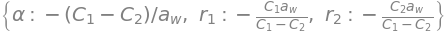

In [16]:
res = sp.solve([c1_expr - c1, c2_expr - c2, axle_width_expr - axle_width], alpha, r1, r2, dict=True)[0]
res

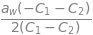

In [17]:
centre_radius = sp.simplify((res[r1] + res[r2]) / 2)
centre_radius

In [18]:
def angular_velocity(c1, c2, aw):
    return (c2 - c1) / aw

def centre_rad(c1, c2, aw):
    return aw * (-c1 - c2) / (2*(c1 - c2))

In [19]:
angular_velocity(sp.pi, 2*sp.pi, 200)

In [20]:
centre_rad(0*sp.pi, 6*sp.pi, 200)

## Forwards, sideways positioning and new relative heading

In [21]:
def predict(angular_velocity, centre_radius, tangential_speed, timestep):
    angle_change = angular_velocity * timestep
    if angle_change != 0:
        # Going around a corner.
        forwards = centre_radius * math.sin(angle_change)
        sideways = centre_radius - centre_radius * math.cos(angle_change)
    else:
        # Going straight forwards or backwards.
        forwards = tangential_speed * timestep
        sideways = 0

    return forwards, sideways, angle_change

In [22]:
predict(4*math.pi, 0, 0, 1)